# My pre-birthday feedback project

So I asked a couple of my friends and people that know me to fill a feedback form for me, just a way 
of getting people's feedbacks and decided to analyze the feedback in this simple project.
So here goes nothing:

### Import important libraries we will use

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# confirming the present working directory
os.getcwd()

'/home/ajala/Documents/Programming/My stuff'

### Read the file to analyze

In [3]:
# Confirm if the file we want to analyze is in the present directory
os.listdir()


['~$alysis of personal feedback I got from my friend.docx',
 'Day_time.png',
 '.ipynb_checkpoints',
 'Day.png',
 'Agroo-predictions.csv',
 'Time.png',
 'Wordcloud_percept.png',
 'README_autoloan_files',
 'snipped.PNG',
 'Birthday-project.ipynb',
 'NIPS-2012-imagenet-classification-with-deep-convolutional-neural-networks-Paper (1).pdf',
 'sample.png',
 'time.png',
 'train.csv',
 'Agroo.ipynb',
 'Tech-Phantom',
 'Agroo-train.csv',
 'Analysis of personal feedback I got from my friend.docx',
 'README_autoloan1.md',
 'Agroo',
 'Wordcloud_pos.png',
 'README_autoloan.md',
 'Wordcloud_critic.png',
 'Sentiment_rating.png',
 'negative_bar.png',
 'My-feedback.csv',
 '.~lock.Analysis of personal feedback I got from my friend.docx#',
 'perception_bar.png',
 'best_model.bin',
 'motivation.png',
 'README_diabetes.md',
 'SampleSubmission.csv',
 'positive_bar.png',
 'belief.png',
 'HASHNODE INTERVIEW WITH AJALA MARVELLOUS.docx',
 'Agroo-Test.csv',
 'books.jpg',
 'day_and_time.png']

In [34]:
df = pd.read_csv("My-feedback.csv")

### Basic description and info about the dataset

In [5]:
# Small overview of the data
df.head()

,Timestamp,What's your idea of who Marve is?,"What's something I do you find particularly annoying, irritating or disgusting? Don't worry, it's completely anonymous. Or maybe something you just think I should stop",What do you think I do very well and I should double down on?,"Any other advice you'll like to give me, or something you've been wanting to say to me?"
0,7/14/2020 23:28:50,He is inquisitive.,Stop squinting his eyes.,Evolving,NaN
1,7/14/2020 23:33:49,"Cool headed, brilliant, bright future awaits",He likes to lead and talk. I don't know of the...,Being himself,NaN
2,7/14/2020 23:36:33,He is an amazing individual and no matter what...,Nothing,He should continue speaking particularly publi...,NaN
3,7/15/2020 0:08:00,"Amazing, loving sweet boy, with great prospects","well, I haven't observed any","keep being you, being zealous for God, being f...","love God more, Trust in the lord with all your..."
4,7/15/2020 4:55:11,He is kind and he is someone who could go out ...,Not that I know of,Continue being a scholar🙂🙃,I would like to tell him to keep being a good...


In [6]:
df.shape

(106, 5)

In [7]:
df.describe()

,Timestamp,What's your idea of who Marve is?,"What's something I do you find particularly annoying, irritating or disgusting? Don't worry, it's completely anonymous. Or maybe something you just think I should stop",What do you think I do very well and I should double down on?,"Any other advice you'll like to give me, or something you've been wanting to say to me?"
count,106,103,102,101,93
unique,106,102,99,98,93
top,7/10/2021 21:13:14,"Uhm a visionary, funny, approachable , island ...",😂 I can’t tell you stop keeping your nails,Being himself,Interesting
freq,1,2,2,3,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   Timestamp                                                                                                                                                                106 non-null    object
 1   What's your idea of who Marve is?                                                                                                                                        103 non-null    object
 2   What's something I do you find particularly annoying, irritating or disgusting? Don't worry, it's compl

In [9]:
df.columns

Index(['Timestamp', 'What's your idea of who Marve is?',
       'What's something I do you find particularly annoying, irritating or disgusting? Don't worry, it's completely anonymous. Or maybe something you just think I should stop',
       'What do you think I do very well and I should double down on?',
       'Any other advice you'll like to give me, or something you've been wanting to say to me?'],
      dtype='object')

In [10]:
xxz = dict([])

In [12]:
for x in range(10):
    xxz = (x, x+1)

In [13]:
xxz

(9, 10)

### Rename columns

In [35]:
new_columns = dict([("What's your idea of who Marve is?", "Perception"),
                    ("What's something I do you find particularly annoying, irritating or disgusting? Don't worry, it's completely anonymous. Or maybe something you just think I should stop", "Negative"),
                    ("What do you think I do very well and I should double down on?", "Positive"),
                    ("Any other advice you'll like to give me, or something you've been wanting to say to me?", "Suggestions")])

In [36]:
new_columns

{"What's your idea of who Marve is?": 'Perception',
 "What's something I do you find particularly annoying, irritating or disgusting? Don't worry, it's completely anonymous. Or maybe something you just think I should stop": 'Negative',
 'What do you think I do very well and I should double down on?': 'Positive',
 "Any other advice you'll like to give me, or something you've been wanting to say to me?": 'Suggestions'}

In [37]:
df = df.rename(columns= new_columns)

### Analyzing the timestamp

In [38]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [39]:
df["Days"] = df['Timestamp'].dt.day_name()

In [40]:
df["Hours"] = df['Timestamp'].dt.hour

In [22]:
df.head()

,Timestamp,Perception,Negative,Positive,Suggestions,Days,Hours
0,2020-07-14 23:28:50,He is inquisitive.,Stop squinting his eyes.,Evolving,NaN,Tuesday,23
1,2020-07-14 23:33:49,"Cool headed, brilliant, bright future awaits",He likes to lead and talk. I don't know of the...,Being himself,NaN,Tuesday,23
2,2020-07-14 23:36:33,He is an amazing individual and no matter what...,Nothing,He should continue speaking particularly publi...,NaN,Tuesday,23
3,2020-07-15 00:08:00,"Amazing, loving sweet boy, with great prospects","well, I haven't observed any","keep being you, being zealous for God, being f...","love God more, Trust in the lord with all your...",Wednesday,0
4,2020-07-15 04:55:11,He is kind and he is someone who could go out ...,Not that I know of,Continue being a scholar🙂🙃,I would like to tell him to keep being a good...,Wednesday,4


In [59]:
time_duration = [-1,6,12,16,20, 23]
time_of_day = ["midnight", "morning", "afternoon", "evening", "night"]

In [60]:
df["Hours"] = pd.cut(df["Hours"], time_duration, labels=time_of_day)

In [61]:
df = df.drop("Timestamp", axis=1)

In [62]:
df.rename(columns={"Hours":"Time"}, inplace=True)

In [63]:
df =df.reindex(columns=["Days", "Time", "Perception", "Negative", "Positive", "Suggestions"])

In [64]:
df.head()

,Days,Time,Perception,Negative,Positive,Suggestions
0,Tuesday,night,He is inquisitive.,Stop squinting his eyes.,Evolving,NaN
1,Tuesday,night,"Cool headed, brilliant, bright future awaits",He likes to lead and talk. I don't know of the...,Being himself,NaN
2,Tuesday,night,He is an amazing individual and no matter what...,Nothing,He should continue speaking particularly publi...,NaN
3,Wednesday,midnight,"Amazing, loving sweet boy, with great prospects","well, I haven't observed any","keep being you, being zealous for God, being f...","love God more, Trust in the lord with all your..."
4,Wednesday,midnight,He is kind and he is someone who could go out ...,Not that I know of,Continue being a scholar🙂🙃,I would like to tell him to keep being a good...


In [65]:
df.Time.isnull().sum()

0

## Analyzing the time people filled the form 

In [66]:
def plot_figure(xvalues, yvalues=None, plottype=None, xlabel=None, ylabel=None, title=None, file_name="sample.png"):
    fig, ax = plt.subplots(1,1, figsize=(8,7))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if plottype == "bar":
        sns.barplot(x=xvalues, y=yvalues)
    else:
        sns.countplot(x=xvalues)
    plt.savefig(file_name, dpi=500, bbox_inches="tight")

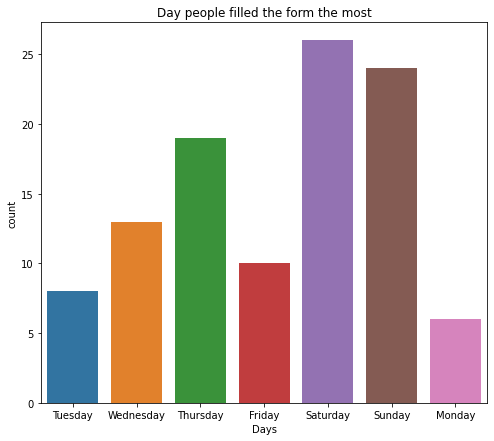

In [67]:
plot_figure(df["Days"], xlabel="Day", ylabel="Count",
               title="Day people filled the form the most")

In [68]:
data = df["Days"].value_counts(ascending=True, normalize=True)

In [69]:
data

Monday       0.056604
Tuesday      0.075472
Friday       0.094340
Wednesday    0.122642
Thursday     0.179245
Sunday       0.226415
Saturday     0.245283
Name: Days, dtype: float64

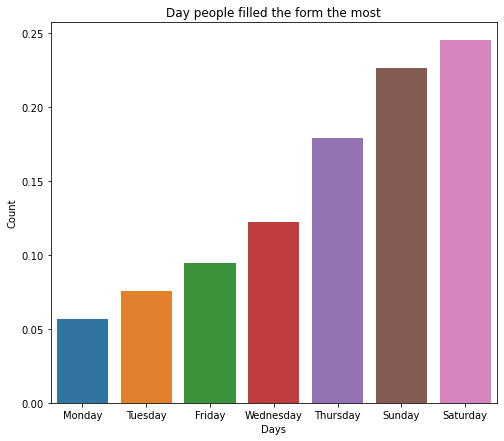

In [70]:
plot_figure(data.index, data.values, plottype="bar", xlabel="Days", ylabel="Count",
               title="Day people filled the form the most", file_name="Day.png")

In [71]:
df.head()

,Days,Time,Perception,Negative,Positive,Suggestions
0,Tuesday,night,He is inquisitive.,Stop squinting his eyes.,Evolving,NaN
1,Tuesday,night,"Cool headed, brilliant, bright future awaits",He likes to lead and talk. I don't know of the...,Being himself,NaN
2,Tuesday,night,He is an amazing individual and no matter what...,Nothing,He should continue speaking particularly publi...,NaN
3,Wednesday,midnight,"Amazing, loving sweet boy, with great prospects","well, I haven't observed any","keep being you, being zealous for God, being f...","love God more, Trust in the lord with all your..."
4,Wednesday,midnight,He is kind and he is someone who could go out ...,Not that I know of,Continue being a scholar🙂🙃,I would like to tell him to keep being a good...


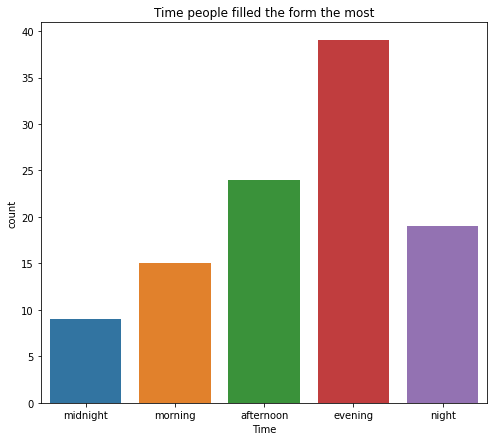

In [72]:
plot_figure(df["Time"], xlabel="Time", ylabel="Count",
               title="Time people filled the form the most", file_name="Time.png")

### Let's view best day-time pair

In [73]:
day_time = df.groupby(["Days", "Time"]).size()

In [74]:
day_time[:10]

Days    Time     
Friday  midnight     5
        morning      4
        afternoon    1
        evening      0
        night        0
Monday  midnight     0
        morning      2
        afternoon    1
        evening      2
        night        1
dtype: int64

In [75]:
day_time.sort_values()

Days       Time     
Wednesday  night         0
Thursday   midnight      0
Sunday     midnight      0
Monday     midnight      0
Saturday   morning       0
Friday     evening       0
           night         0
Tuesday    midnight      0
Monday     night         1
Saturday   midnight      1
Tuesday    evening       1
Friday     afternoon     1
Tuesday    afternoon     1
           morning       1
Monday     afternoon     1
           evening       2
Thursday   morning       2
Monday     morning       2
Sunday     morning       2
Wednesday  evening       2
           midnight      3
           morning       4
           afternoon     4
Sunday     afternoon     4
           night         4
Saturday   night         4
Friday     morning       4
Thursday   night         5
           afternoon     5
Tuesday    night         5
Friday     midnight      5
Thursday   evening       7
Saturday   afternoon     8
           evening      13
Sunday     evening      14
dtype: int64

In [76]:
day_time.index

MultiIndex([(   'Friday',  'midnight'),
            (   'Friday',   'morning'),
            (   'Friday', 'afternoon'),
            (   'Friday',   'evening'),
            (   'Friday',     'night'),
            (   'Monday',  'midnight'),
            (   'Monday',   'morning'),
            (   'Monday', 'afternoon'),
            (   'Monday',   'evening'),
            (   'Monday',     'night'),
            ( 'Saturday',  'midnight'),
            ( 'Saturday',   'morning'),
            ( 'Saturday', 'afternoon'),
            ( 'Saturday',   'evening'),
            ( 'Saturday',     'night'),
            (   'Sunday',  'midnight'),
            (   'Sunday',   'morning'),
            (   'Sunday', 'afternoon'),
            (   'Sunday',   'evening'),
            (   'Sunday',     'night'),
            ( 'Thursday',  'midnight'),
            ( 'Thursday',   'morning'),
            ( 'Thursday', 'afternoon'),
            ( 'Thursday',   'evening'),
            ( 'Thursday',     'night'),


In [77]:
day_time.index = day_time.index.values

In [78]:
day_time = day_time.sort_values()

In [79]:
day_time[:10]

(Wednesday, night)      0
(Thursday, midnight)    0
(Sunday, midnight)      0
(Monday, midnight)      0
(Saturday, morning)     0
(Friday, evening)       0
(Friday, night)         0
(Tuesday, midnight)     0
(Monday, night)         1
(Saturday, midnight)    1
dtype: int64

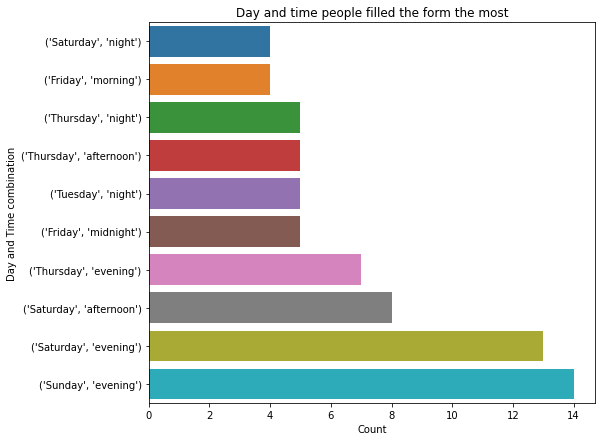

In [80]:
plot_figure(day_time.values[-10:], day_time.index[-10:], plottype="bar", xlabel="Count", ylabel="Day and Time combination",
               title="Day and time people filled the form the most", file_name="Day_time.png")

## Analyzing the actual feedback

### Perception

So this is what most peple who filled the feedback thought about me

In [102]:
perceptions = df["Perception"]

In [103]:
perceptions

0                                     He is inquisitive.
1           Cool headed, brilliant, bright future awaits
2      He is an amazing individual and no matter what...
3        Amazing, loving sweet boy, with great prospects
4      He is kind and he is someone who could go out ...
                             ...                        
101                                  Marve is a nice guy
102                                 A determined fellow 
103                                          A quiet guy
104                                      Data scientist 
105    He seems like an intelligent, witty and funny ...
Name: Perception, Length: 106, dtype: object

In [104]:
perceptions.size

106

In [105]:
perceptions.values[:10]

array(['He is inquisitive.',
       'Cool headed, brilliant, bright future awaits',
       'He is an amazing individual and no matter what anybody says during this review, he should always listen to what God says about him. GOD IS ALWAYS RIGHT',
       'Amazing, loving sweet boy, with great prospects',
       'He is kind and he is someone who could go out of his way to help others, a rare trait...',
       'Friend,', 'He is disciplined and friendly ',
       'He is a purpose driven guy. He is talented and very intelligent. He is good at what he does too.',
       "You're intelligent. You just need to work more on conveying your ideas. Coherence. Expressing your self with eloquence and clarity, so people don't misunderstand your ideas. Also, be more sensitive towards people. ",
       "First of all,The font sucks. \nSecondly, Secondly\nThirdly,I think he's a good guy. Slightly strange, but good."],
      dtype=object)

So we want to to make a chain of preprocessing we want to do on the texts

### Remove punctuations

We want to remove the punctuations in data, so avoid confusion and duplicity

In [81]:
import sys
import unicodedata

def create_puncts():
    """Create punctuations from punctuations in unicode category"""
    punctuation = dict([(i, " ") for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P')])
    return punctuation


def remove_punctuations(x):
    if isinstance(x, str):
        return x.translate(punctuations)

In [82]:
punctuation =create_puncts()
#punctuation

In [109]:
perceptions = [string.translate(punctuation) for string in perceptions.values if isinstance(string, str)]

In [110]:
perceptions[:10]

['He is inquisitive ',
 'Cool headed  brilliant  bright future awaits',
 'He is an amazing individual and no matter what anybody says during this review  he should always listen to what God says about him  GOD IS ALWAYS RIGHT',
 'Amazing  loving sweet boy  with great prospects',
 'He is kind and he is someone who could go out of his way to help others  a rare trait   ',
 'Friend ',
 'He is disciplined and friendly ',
 'He is a purpose driven guy  He is talented and very intelligent  He is good at what he does too ',
 'You re intelligent  You just need to work more on conveying your ideas  Coherence  Expressing your self with eloquence and clarity  so people don t misunderstand your ideas  Also  be more sensitive towards people  ',
 'First of all The font sucks  \nSecondly  Secondly\nThirdly I think he s a good guy  Slightly strange  but good ']

In [112]:
len(perceptions)

103

### Remove trailing and preceding space and convert all to lowercase

We want to make the data compact by removing unnecesary space before and after each sentence. we also want to convert all to lowercase, this is because words starting with upper and lower cases are considered dinstinct and not the same


In [83]:
def clean_text(x):
    """clean the text to remove trailing and preceeding texts and convert all to small letters"""
    # remove unnecessary starting an ending spce
    x = x.strip()
    # Convert them all to lowercase to avoid duplications
    x = x.lower()
    return x

In [123]:
perceptions = [clean_text(i) for i in perceptions]

### create vector of the words

Next we want to convert our test to vectors, since the computer can only deal with zeros and ones, we will generate a token for all the words in the selected dataset, make them into columns and for every present word in the sentence, we will select it (make with one, if not zero)

In [84]:
# Import the package we will use
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
# ngram to identify word pairs too and not just words only
# stopwords to remove stop words like "I, me, is, to, of, etc"
count_2_gram = CountVectorizer(ngram_range=(1,2), stop_words="english")

In [126]:
text_data = count_2_gram.fit_transform(perceptions)

In [127]:
text_data = text_data.toarray()

In [128]:
columns = count_2_gram.get_feature_names_out()

In [129]:
new_df = pd.DataFrame(text_data, columns=columns)

In [130]:
new_df.head()

,able,able relate,acquire,acquire knowledge,acquiring,acquiring knowledge,admire,admire sense,admit,advisory,...,working,working kind,working person,working working,yeah,yeah plain,yearns,yearns acquire,young,young man
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Columns: 659 entries, able to young man
dtypes: int64(659)
memory usage: 530.4 KB


In [132]:
new_df.sum().sort_values()[-50:]

open                   2
nice guy               2
don                    2
need work              2
need                   2
focused person         2
getter                 3
weird                  3
focused                3
big                    3
heart                  3
ideas                  3
innovative             3
know                   3
life                   3
working                3
marvellous             3
awesome                3
ambitious              3
things                 3
really                 3
says                   3
amazing individual     3
talk                   3
driven                 3
like                   4
god                    4
sweet                  4
people                 4
nice                   4
man                    4
help                   4
loves                  4
knowledge              4
tech                   5
funny                  5
goal                   5
friend                 5
kind                   6
good                   7


Now that we that we have gotten all we need and know how the project flow wil be like, lets aggregate all our functions into two, one to parse text and the other to create dataframe from our vectoriser

In [85]:
def parse_text(dataframe, column):
    data = dataframe[column].values
    data = [sentence.translate(punctuation) for sentence in data if isinstance(sentence, str)]
    data = [clean_text(sentence) for sentence in data]
    return data

In [86]:
def get_tops(data, ntop, n_gram=2):
    vectorizer = CountVectorizer(ngram_range=(1,n_gram), stop_words="english")
    data = vectorizer.fit_transform(data)
    data = data.toarray()
    columns = vectorizer.get_feature_names_out()
    df = pd.DataFrame(data, columns=columns)
    most_freq = df.sum().sort_values(ascending=False)[:ntop]
    return most_freq

In [87]:
# let's get the same perception data again using this two functions
percep_data = parse_text(df, "Perception")
top50_percep = get_tops(percep_data, 50)

In [136]:
top50_percep[:10]

guy            21
person         15
intelligent    13
smart          13
amazing         9
think           9
cool            9
great           8
individual      8
friendly        7
dtype: int64

Next, there are some words there that don't make sense for the analyse we want to do e.g guy, person et, so we will remove them

In [137]:
def drop_values(data, words):
    return data.drop(words)

In [441]:
values_2drop = ["guy", "person", "individual", "loves", "help", "man", "people", "don", "need", "talk", "says", "like", "things", "know"]
top_percept = drop_values(top50_percep, values_2drop)

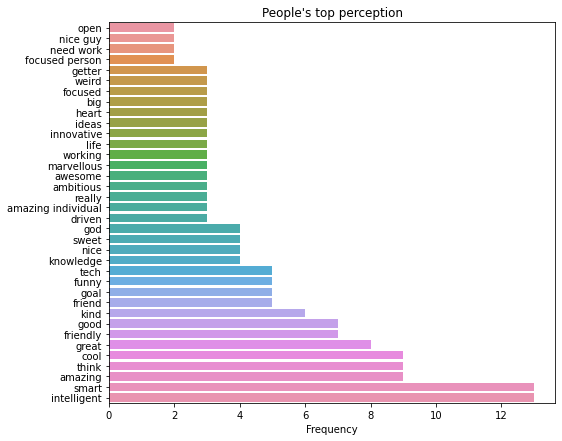

In [657]:
plot_figure(top_percept.values, top_percept.index, plottype="bar", xlabel="Frequency",
            title="People's top perception", file_name="perception_bar.png" )

Next, we want to create a list of the top words in their frequency i.e if a word has a frequency of 2, it should appear twice

In [138]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [510]:
def wordcloud_data(data, values_2drop=None):
    cloud_data = get_tops(data, 200)
    if values_2drop != None:
        cloud_data = drop_values(cloud_data, values_2drop)
    cloud_data = cloud_data.to_dict()
    return cloud_data


In [486]:
def create_wordcloud(wordcloud, title=None, file_name="sample.png"):
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    ax.set_title(title)
    cloud_plt = cloud.generate_from_frequencies(wordcloud)
    ax.imshow(cloud_plt)
    ax.axis("off")
    plt.savefig(file_name, dpi=500)

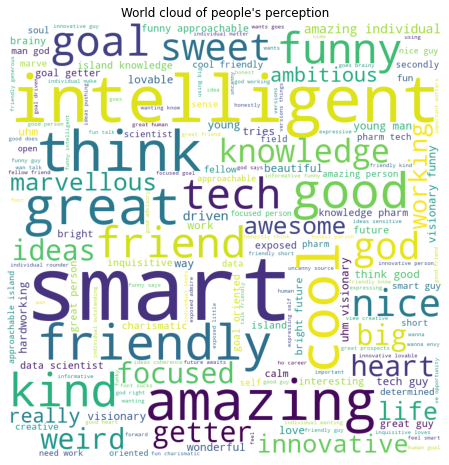

In [658]:
word_percept = wordcloud_data(percep_data)
create_wordcloud(word_percept, title= "World cloud of people's perception", file_name="Wordcloud_percept.png")

### Negative Feedbacks

Note that these are actually not negative feedbacks, they are just things people felt I need to work on or improve

### Bar plot

In [542]:
critic_data = parse_text(df, "Negative")

In [139]:
def get_tops_(data, ntop):
    vectorizer = CountVectorizer(ngram_range=(1,3), stop_words="english")
    data = vectorizer.fit_transform(data)
    data = data.toarray()
    columns = vectorizer.get_feature_names_out()
    df = pd.DataFrame(data, columns=columns)
    most_freq = df.sum().sort_values()[-ntop:]
    return most_freq

In [529]:
top_critic = get_tops_(critic_data, 200)

In [530]:
top_critic[:50]

hmm think pretty          1
inferno                   1
insensitive jokes         1
insensitive jokes care    1
irritated                 1
irritated say             1
irritated say annoyed     1
irritates don             1
irritates don know        1
insensitive               1
irritates haven           1
hmm sure                  1
hmm fun                   1
happens frustrating       1
hard look                 1
hard look decent          1
harsher                   1
harsher mean              1
haven noticed             1
haven noticed thing       1
hmm fun bro               1
haven observed            1
haven remember high       1
haven seen bad            1
hear                      1
hear clearly              1
hear clearly attribute    1
high school               1
high school easily        1
haven remember            1
irritates ll advise       1
irritates ll sure         1
irritates want            1
kinda talk                1
kinda talk lot            1
know close          

In [531]:
top_critic[50:100]

keeping long nails           1
keeping long                 1
just wanna sell              1
irritates want excited       1
irritating                   1
irritating works             1
irritating works good        1
isn hard                     1
isn hard look                1
isn irritating               1
isn irritating works         1
jokes ain                    1
jokes ain funny              1
jokes care                   1
jokes care fun               1
just close                   1
just close know              1
just meetings                1
just meetings conferences    1
just wanna                   1
happens                      1
guess friends                1
high                         1
zoning times don             1
gets confused lifestyle      1
gets confused                1
follow past                  1
gets                         1
funny                        1
fun just meetings            1
fun just                     1
feel don hard                1
feel tim

In [532]:
top_critic[100:150]

friends                       1
feedback curious              1
feel don                      1
feedback                      1
grammar feel times            1
eyes bag red                  1
grammar feel                  1
grammar                       1
gotten people relate          1
gotten people                 1
far concerned                 1
far concerned think           1
far haven                     1
gotten                        1
giving                        1
goodluck traveling            1
far haven seen                1
goodluck                      1
goodluck traveling tunisia    1
fashion                       1
fast times                    1
fast                          1
fashion sense people          1
giving money                  1
fast times able               1
follow                        1
fashion sense                 1
god                           1
easily                        2
isn                           2
keeping nails                 2
far     

In [533]:
top_critic[150:]

thing                  2
stop keeping nails     2
tell stop keeping      2
tell stop              2
pictures               2
close know             2
haven seen             2
talk                   2
decent                 2
takes                  2
cool                   2
hard                   2
good                   2
hurt                   2
hmm think              2
banter                 2
irritates ll           2
doesn                  2
look                   2
better                 2
doing                  2
fun                    2
ll                     3
seriously              3
nails                  3
eyes                   3
times                  3
tell                   3
seen                   3
keeping                3
care                   3
stop keeping           3
sure                   4
hmm                    4
maybe                  4
close                  4
just                   4
like                   4
little                 5
say                    6


In [551]:
critics = ["insensitive jokes", "don know", "stop keeping nails", "haven seen", "banter", "nails", "eyes", 
          "focus", "jokes", "attention", "fashion sense", "grammar", "goodluck traveling", "eyes bag red",
          "forgetting food", "jokes ain funny", "kinda talk lot", "hear clearly", "haven seen bad", 
          "haven noticed", "haven observed"]

In [552]:
critics = top_critic[critics].sort_values()

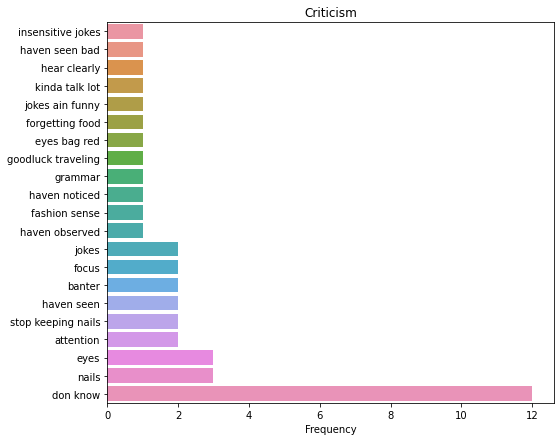

In [659]:
plot_figure(critics.values, critics.index, plottype="bar", xlabel="Frequency",
            title="Criticism", file_name="negative_bar.png" )

### World cloud

In [555]:
critic_wordcloud = top_critic.to_dict()

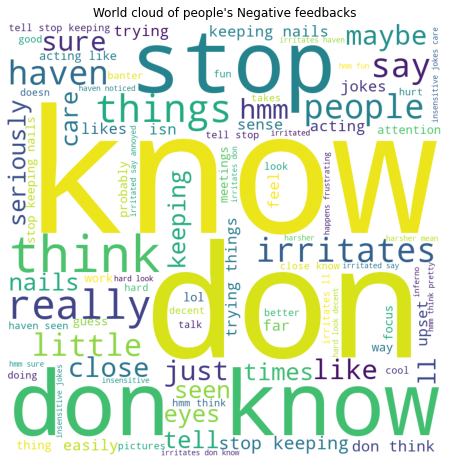

In [660]:
create_wordcloud(critic_wordcloud, title= "World cloud of people's Negative feedbacks", file_name="Wordcloud_critic.png")

### Positive feedbacks

In [744]:
pos_data = parse_text(df, "Positive")
top_pos_ = get_tops_(pos_data, 100)

In [559]:
top_pos[:50]

heart reach              1
heart                    1
hardwork                 1
hardly somethings        1
hardly                   1
hard                     1
happen status            1
happen                   1
hair grow                1
high                     1
getting knowledge        1
goes                     1
zealous god              1
frrr                     1
funny                    1
fighting right           1
focus academics          1
fighting                 1
friends                  1
focused                  1
funny nice               1
friendly nature          1
fail wants               1
future                   1
fail                     1
excellence academics     1
future bright            1
generation attainable    1
especially               1
forward                  1
genuinely care           1
genuinely                1
excellence               1
especially ai            1
filled                   1
generation               1
friendly mind            1
g

In [560]:
top_pos[50:]

believing           2
work                2
just                2
write               2
writing shouldn     2
intelligent         2
wants               2
self development    2
friendly            2
friend              2
selfless            2
skills              2
debating            2
day                 2
stuff               2
shouldn stop        2
mind                2
going               2
taking              2
post                2
coding              2
love                2
development         2
shouldn             2
goals               3
stop                3
innovative          3
world               3
speaking            3
smart               3
academics           3
nice                3
god                 3
person              3
care                3
thing               3
helping             3
great               3
like                3
getting             3
good                4
things              4
know                4
knowledge           6
think               6
writing   

In [745]:
top_pos_[:50]

friends                         1
friendly nature                 1
friendly mind                   1
funny nice                      1
focus academics                 1
excellence academics            1
excellence                      1
especially                      1
especially ai                   1
forward                         1
especially ai rooting           1
focused smart intelligent       1
focused smart                   1
evolving                        1
enduring spirit time            1
focused                         1
filled                          1
future                          1
drive                           1
fail wants                      1
getting knowledge               1
drive cos                       1
fighting right                  1
fighting right thing            1
drive cos tech                  1
endeavors                       1
genuinely care friends          1
endeavors universe align        1
genuinely care                  1
endeavors univ

In [746]:
top_pos_[50:]

writing shouldn         2
writing shouldn stop    2
double                  2
just                    2
selfless                2
self development        2
intelligent             2
shouldn                 2
stuff                   2
coding                  2
taking                  2
going                   2
day                     2
friendly                2
mind                    2
friend                  2
debating                2
post                    2
love                    2
shouldn stop            2
focus                   2
development             2
proud                   2
skills                  2
smart                   3
academics               3
like                    3
getting                 3
goals                   3
god                     3
stop                    3
thing                   3
person                  3
world                   3
great                   3
speaking                3
care                    3
nice                    3
helping     

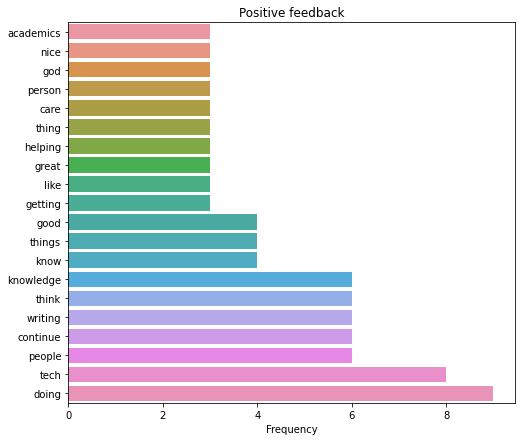

In [661]:
plot_figure(top_pos.values[-20:], top_pos[-20:].index, plottype="bar", xlabel="Frequency",
            title="Positive feedback", file_name="positive_bar.png" )

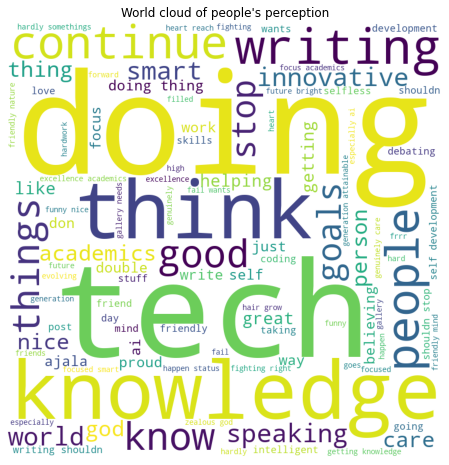

In [662]:
word_pos = get_tops(pos_data, 100).to_dict()
create_wordcloud(word_pos, title= "World cloud of people's perception", file_name="Wordcloud_pos.png")

## Estimating extent of positivity or negativity of feedbacks

Quick notice: This is very experimental, and thus not set in stone

So I was thinking of something, if I wanted to estimate how good or harsh the feedbacks are, can I get that? By good, i mean if I want to rate those feedbacks on a scale of 1 to 10, one being very harsh and bad cooments like you're foolish, stupid or something and 10 being very positive and great comments like you're the second best thing since coming of jesus or advent of slice bread, you get, something like that

So let's see if we can

In [88]:
pos = parse_text(df, "Positive")
neg = parse_text(df, "Negative")

In [89]:
print(f"Length of positive comments: {len(pos)}")
print(f"Length of negative comments: {len(neg)}")

Length of positive comments: 101
Length of negative comments: 102


Next, let's make a dataframe for both and them we will stack them on top of another

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
def make_df(data):
    vectorizer = CountVectorizer(ngram_range=(1,3), stop_words="english")
    data = vectorizer.fit_transform(data)
    data = data.toarray()
    columns = vectorizer.get_feature_names_out()
    df = pd.DataFrame(data, columns=columns)
    return df

In [92]:
combined = pos + neg

In [93]:
len(combined)

203

In [94]:
comb_df = make_df(combined)

In [95]:
comb_df.shape

(203, 1279)

In [96]:
# Create target values, remember first 101 == pos and last 102 == "neg"
target = np.concatenate([np.ones(101), np.zeros(102)])

In [97]:
target.shape

(203,)

Next, we will split our data our data into test and split data

Note: This is not the ideal method, I ought to have splitted  before generating the dataframe to avoid data leakage but my dataset is very small, I'm afraid if I split that way, my test may contain words that are not in my training set (or not), sha that is why

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(comb_df.values, target, test_size = 0.3, random_state = 2022)

In [100]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 2022)

In [101]:
len(X_train), len(X_val), len(X_test), len(Y_train), len(Y_val), len(Y_test)

(99, 43, 61, 99, 43, 61)

Next, we will define our machine learning model, we'll be trying online Support Vector Machine
This is because it is good for very large dimensional data and also non-linearly divisible values,
we will also be scaling the data because SVM works best with a scaled dataset

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [103]:
svm_scaler_pipeline = Pipeline((
                        ("scaler", StandardScaler()),
                        ("svm", SVC(kernel="rbf", gamma=0.1, C=0.1))
                        ))


In [104]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_val_scaled = StandardScaler().fit_transform(X_val)

In [105]:
len(X_train_scaled)

99

In [106]:
param = dict([
    ("C", [0.001, 0.01, 0.1, 1, 10, 100]),
    ("gamma", [0.001, 0.01, 0.1, 1, 10, 100]),
              ])

In [107]:
param

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [108]:
gridcv = GridSearchCV(SVC(kernel="rbf"), param, cv=5)
gridcv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [109]:
gridcv.score(X_train_scaled, Y_train)

0.9595959595959596

In [110]:
gridcv.score(X_val_scaled, Y_val)

0.5581395348837209

In [111]:
gridcv.best_params_

{'C': 10, 'gamma': 0.001}

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
param = dict([("C", [0.001, 0.01, 0.1, 1, 10, 100])])
gridlogit = GridSearchCV(LogisticRegression(), param, cv=10)

In [115]:
gridlogit.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [116]:
gridlogit.score(X_val_scaled, Y_val)

0.6511627906976745

In [117]:
gridlogit.score(X_train_scaled, Y_train)

0.9595959595959596

In [118]:
gridlogit.score(X_val_scaled, Y_val)

0.6511627906976745

In [119]:
X_test_scaled = StandardScaler().fit_transform(X_test)

In [120]:
gridlogit.score(X_test_scaled, Y_test)

0.6557377049180327

In [121]:
X = StandardScaler().fit_transform(comb_df.values)

In [122]:
rating = gridlogit.predict_proba(X)[:, 1]

In [206]:
rating

array([0.49462722, 0.49462722, 0.91710197, 0.61286249, 0.75201786,
       0.73479877, 0.74285535, 0.95019089, 0.78875571, 0.94906561,
       0.49462722, 0.76209727, 0.75544222, 0.87971933, 0.49462722,
       0.49462722, 0.64572196, 0.49462722, 0.75544222, 0.50508547,
       0.57126026, 0.76876111, 0.49462722, 0.85818725, 0.9251061 ,
       0.63694911, 0.69899154, 0.59635381, 0.51950562, 0.83776706,
       0.49462722, 0.55115311, 0.57322016, 0.83452368, 0.93074834,
       0.96162369, 0.44229987, 0.63694911, 0.55729919, 0.72977107,
       0.49462722, 0.77840578, 0.89205968, 0.45196105, 0.96236401,
       0.95345667, 0.75178216, 0.48064434, 0.50739162, 0.83724522,
       0.76599862, 0.55057614, 0.58260985, 0.61275853, 0.49462722,
       0.48028615, 0.49462722, 0.42229066, 0.51698642, 0.49462722,
       0.76876111, 0.49462722, 0.85946672, 0.55729919, 0.61275853,
       0.49462722, 0.55657972, 0.94199211, 0.49462722, 0.49462722,
       0.88095606, 0.9181949 , 0.55115311, 0.49462722, 0.49462

In [207]:

new_Y = np.digitize(rating, bins=[0.1,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], right = True)

In [208]:
new_Y

array([4, 4, 9, 6, 7, 7, 7, 9, 7, 9, 4, 7, 7, 8, 4, 4, 6, 4, 7, 5, 5, 7,
       4, 8, 9, 6, 6, 5, 5, 8, 4, 5, 5, 8, 9, 9, 4, 6, 5, 7, 4, 7, 8, 4,
       9, 9, 7, 4, 5, 8, 7, 5, 5, 6, 4, 4, 4, 4, 5, 4, 7, 4, 8, 5, 6, 4,
       5, 9, 4, 4, 8, 9, 5, 4, 4, 4, 8, 4, 4, 3, 4, 6, 6, 5, 2, 4, 8, 4,
       5, 4, 5, 5, 4, 9, 4, 7, 6, 4, 5, 5, 8, 1, 3, 4, 2, 4, 4, 2, 4, 0,
       1, 5, 2, 2, 4, 0, 4, 1, 5, 4, 4, 4, 0, 4, 3, 4, 0, 4, 4, 1, 0, 4,
       0, 4, 3, 4, 4, 3, 4, 2, 4, 1, 4, 4, 3, 4, 1, 3, 4, 1, 3, 1, 1, 2,
       4, 2, 4, 4, 4, 4, 1, 5, 4, 2, 3, 2, 4, 3, 4, 3, 2, 3, 3, 4, 4, 4,
       2, 5, 4, 0, 3, 3, 1, 0, 2, 4, 3, 4, 0, 4, 4, 3, 2, 4, 4, 0, 3, 3,
       0, 0, 4, 3, 4])

In [209]:
new_Y += 1

In [210]:
values, counts  = np.unique(new_Y, return_counts=True)

In [211]:
values = values/10
values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [129]:
values = [str(x) for x in values]

In [212]:
values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [213]:
counts = counts/np.sum(counts)
counts

array([0.0591133 , 0.05418719, 0.06896552, 0.09852217, 0.37438424,
       0.1182266 , 0.04926108, 0.06896552, 0.05418719, 0.05418719])

In [214]:
counts[:int(len(counts)/2)] *= -1

In [215]:
counts

array([-0.0591133 , -0.05418719, -0.06896552, -0.09852217, -0.37438424,
        0.1182266 ,  0.04926108,  0.06896552,  0.05418719,  0.05418719])

In [136]:
from matplotlib.colors import TwoSlopeNorm

In [137]:
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
colors = [plt.cm.RdYlGn(norm(i)) for i in counts]

<BarContainer object of 10 artists>

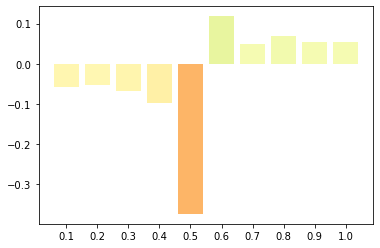

In [138]:
plt.bar(values,height=counts, color=colors)

Text(0.5, 0, 'Sentiments')

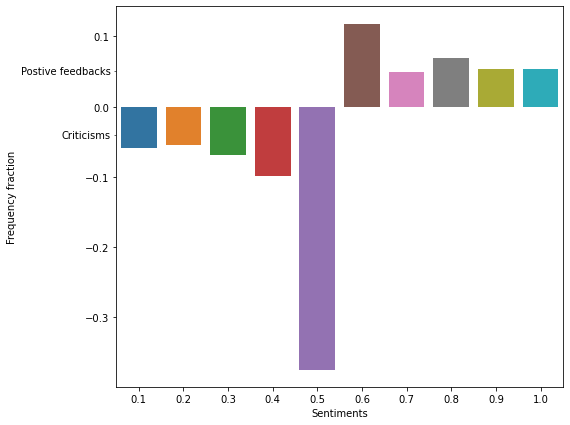

In [239]:
fig, ax = plt.subplots(1, 1, figsize=(8,7))
sns.barplot(x=values,y=counts)
#ax = ax.gca()
ax.yaxis.set_minor_locator(ticker.FixedLocator((-0.04, 0.05)))
ax.yaxis.set_minor_formatter(ticker.FixedFormatter(('Criticisms', "Postive feedbacks")))
plt.setp(ax.yaxis.get_minorticklabels(), size=10, va="center")
ax.set_ylabel("Frequency fraction")
ax.set_xlabel("Sentiments")
#plt.yticks([])

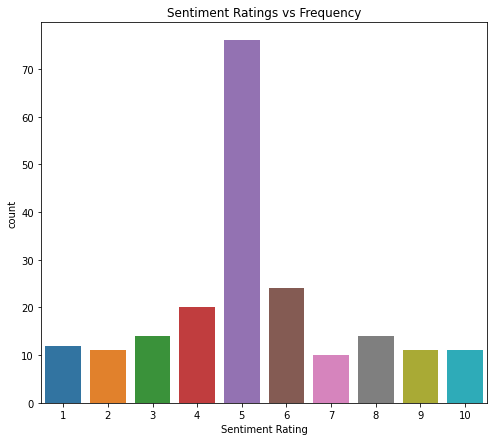

In [195]:
plot_figure(new_Y, xlabel="Sentiment Rating", ylabel = "Frequency",
            title="Sentiment Ratings vs Frequency", file_name="Sentiment_rating.png" )